**K-Nearest Neighbours**

**Objective:** 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\Zoo.csv')
print(df)

    animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

In [4]:
print(df.head())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [5]:
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [33]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
print(df.columns)

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


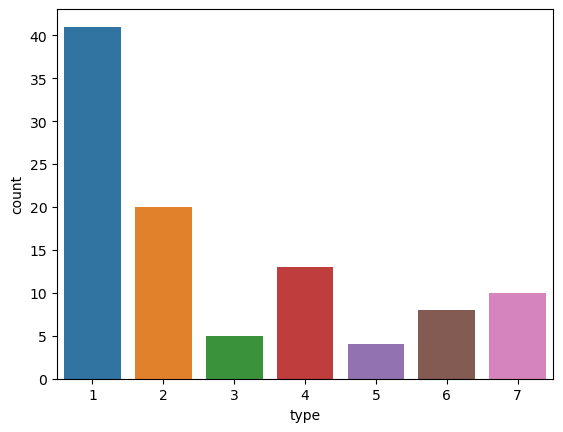

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='type', data=df)
plt.show()

The countplot visualizes the distribution of animal type in the dataset it shows the number of occurences for each unique animal type in the dataset. from the plot can be observed which animal types are more common and which ones are less frequent. This helps us understand the class distribution and whether the dataset is balanced or imbalanced

**2.Preprocess the Data**

In [34]:
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


**Box plot**

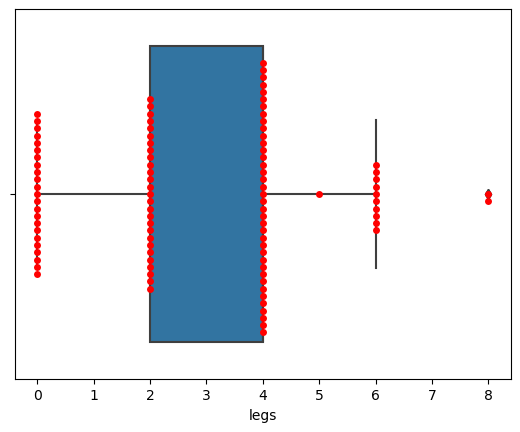

In [36]:
sns.boxplot(x=df['legs'])
sns.swarmplot(x=df['legs'], color='red')
plt.show()

In this code, a box plot and ewarm plot are created to visualize the distribution of the 'legs' feature in the dataset.
The box plot shows the range, quartiles, and potential outliers for the number of legs across different animals. The box represents the interquartile range the line inside the box shows the median and the whiskers extend to show the overall spread of the data. Outliers if any are displayed as points outside the whiskers.
The swarm plot overlays individual data points providing a more detailed view of the exact number of legs for each animal. This allows for better insight into the distribution and frequency of the value.

**Splitting dataset into training and testing sets**

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['type', 'animal name'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In this code the dataset is split into features(X) and the target label(y) . The column 'type' is the target variable representing the animal type all other columns except 'animal name' are used as features. The train_test_split function is used to divide the dataset into training and testing sets. Specifically 80% of the data is used for training the model and 20% is reserved for testing. The random_state-42 checks reproducibility means the same split is produced each time the code run

**Implementing knn**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print('F1_scorez:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1_scorez: 0.9333333333333333


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this code the KNN algorithm is used to classify the dataset The KNN classifier is initialized with n_neighbors=3 means it looks at the 3 nearest neighbors to make predictions.
The training data is used to train the model.
The test is then used to make predictions which are stored in y_pred.
The model's performance is evaluated using 
Accuracy measures how many predictions were correct out of the total number of predictions.
Precision: Indicates how many of the predicted positive cases were actually positive.
Recall: This shows how many actual positive cases were correctly predicted.
F1 Score: Balances precision and recall mostly useful when classes are imbalanced.


**Visualizing the Decision Boundaries**

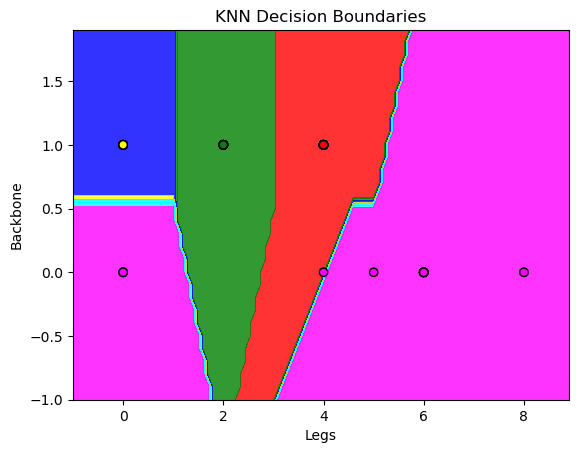

In [31]:
import numpy as np
from matplotlib.colors import ListedColormap
X= df[['legs', 'backbone']].values
y = df['type'].values

knn.fit(X,y)

x_min, x_max = X[:, 0].min()-1,X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue', 'yellow', 'cyan','magenta')))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red','green','blue','yellow','cyan', 'magenta')))
plt.xlabel('Legs')
plt.ylabel('Backbone')
plt.title('KNN Decision Boundaries')
plt.show()

KNN algorithm was used to classify animal type based on the feature 'legs' and 'backbone' 
1.Selecting Features:
Two features 'legs' and 'backbone' were selected from the dataset to classify animal types.

2. Model training: The KNN was trained using these features and the corresponding animal types.

3. Creating a Mesh Grid: A mesh grid was made over the range of values in the selected features extending beyond the minimum and maximum values to check the plot covers all possible points. This grid helps in plotting the decision boundaries.

4. Predicting class Labels: The trained KNN model predicted the class labels for each point in the grid The results were reshaped to fit the grid structure.

5. Plotting Decision Boundaries: The decision boundaries were plotted using different colors to show how the KNN model classifies different regions of the feature space.

6. Plotting Data points: The actual data points were also plotted on the graph where each point represents an animal type and is colored according to its actual class.


This visualization helps to understand how the KNN model seperates different animal types based on the 'legs' and 'backbone' features and how it forms decision boundaries between different classes.

**Interview Questions**

1. What are the key hyperparameters in KNN?

K(number of neighbors): The most important hyperparameter, determining how many nearest neighbors to consider
**Distance Metric**:This defies how the distance between points is calculated
**Weighting of Neighbors**: Whether closer neighbors should have more influence than distance ones.

2.What distance metrics can be used in KNN?

"Eucliden Distance": default and most common for continuous features
"Manhattan Distance": Good for high-dimensional or grid-like data
"Minkowski Distance": generalized distance metric, inclides Euclidean and Manhattan as special cases
"Hamming Distance": for categorical variables.